In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

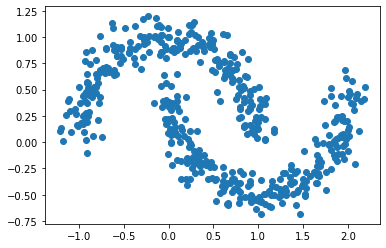

In [2]:
np.random.seed(111)
X, y = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:, 0], X[:, 1])
plt.savefig("datos_DBSCAN.pdf")
plt.show()

In [ ]:
modelo = DBSCAN(eps=0.15, min_samples=2)
c=modelo.fit_predict(X)
np.unique(c)

In [ ]:
plt.scatter(x= X[np.where(c == 0),0], y= X[np.where(c == 0),1], marker='*')
plt.scatter(x= X[np.where(c == 1),0], y= X[np.where(c == 1),1], marker='+')
plt.scatter(x= X[np.where(c == 2),0], y= X[np.where(c == 2),1], marker='o')
plt.scatter(x= X[np.where(c == -1),0], y= X[np.where(c == -1),1], marker='s')
plt.savefig("clusters_DBSCAN.pdf")
plt.show()

In [ ]:
modelo = DBSCAN(eps=0.15, min_samples=5)
c=modelo.fit_predict(X)
np.unique(c)

c

In [ ]:
modelo = DBSCAN(eps=0.15, min_samples=3)
c=modelo.fit_predict(X)
np.unique(c)

In [ ]:
plt.scatter(x= X[np.where(c == 0),0], y= X[np.where(c == 0),1], marker='*')
plt.scatter(x= X[np.where(c == 1),0], y= X[np.where(c == 1),1], marker='+')
plt.scatter(x= X[np.where(c == -1),0], y= X[np.where(c == -1),1], marker='s')
plt.savefig("clusters_DBSCAN_segunda.pdf")
plt.show()

In [ ]:
modelo = DBSCAN(eps=0.1, min_samples=5)
c=modelo.fit_predict(X)
np.unique(c)

In [ ]:
from sklearn.metrics import silhouette_score

labels=modelo.labels_
n_clusters= len(set(labels)) - (1 if -1 in labels else 0)
n_clusters
c=modelo.fit_predict(X)                        
labels = modelo.labels_
n_noise_ = list(labels).count(-1)
silhouette_avg = silhouette_score(X,labels)
silhouette_avg

In [18]:
import pandas as pd
from sklearn.metrics import silhouette_score

eps_vec=np.arange(start=0.1, stop=0.9, step=0.01)
min_sample_vec=np.arange(start=2, stop=5, step=1)

sil_avg = []
max_value = [0,0,0,0]

for eps_p in eps_vec:
    for min_sample_p in min_sample_vec:
        
        modelo = DBSCAN( eps =eps_p, min_samples = min_sample_p)
        c=modelo.fit_predict(X)                        
        labels = modelo.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        
        if n_clusters > 1:
            silhouette_avg = silhouette_score(X,labels)
            ind = silhouette_score(X,labels)
            if ind > max_value[3]:
                max_value=(eps_p, min_sample_p, n_clusters, ind)
                sil_avg.append(ind)
                
print("epsilon= %.4f" % max_value[0], 
      "\min_sample=", max_value[1],
      "\ numero de grupos=", max_value[2],
      "\indice silhouette= %.4f" % max_value[3])

epsilon= 0.1600 \min_sample= 2 \ numero de grupos= 2 \indice silhouette= 0.3207


In [19]:
modelo = DBSCAN(eps=0.16, min_samples=2)
c=modelo.fit_predict(X)
np.unique(c)

array([0, 1])

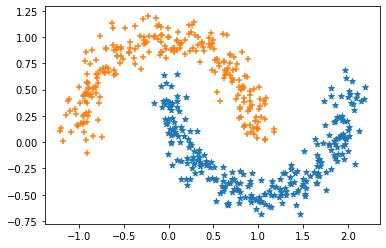

In [20]:
plt.scatter(x= X[np.where(c == 0),0], y= X[np.where(c == 0),1], marker='*')
plt.scatter(x= X[np.where(c == 1),0], y= X[np.where(c == 1),1], marker='+')
plt.savefig("DBSCAN_optimo.pdf")
plt.show()